# **TASK-4: SPAM SMS DETECTION**
**Aim:**  is to accurately classify incoming SMS messages as either spam or legitimate (ham) using classification algorithms.

>#  **Samuel Lunghe**





# **Importing the Dataset**

In [21]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
# Define the path to the dataset file in your Google Drive
file_path = "/content/drive/MyDrive/ColabNotebooks/CODSOFT/SPAM_SMS_DETECTION/spam.csv"
# Load the dataset into a pandas DataFrame
dataset = pd.read_csv(file_path,encoding='latin1')
# Display the first few rows of the dataset
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
dataset.describe()
display(dataset.columns,dataset.shape)
#dataset.value_counts()

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

(5572, 5)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# **Data Preprocessing**
## **>> Checking for and Handling Missing values**

In [25]:
import pandas as pd

def check_missing_values(df):
    # Count the missing values for each column
    missing_values = dataset.isnull().sum()
    print(missing_values)

check_missing_values(dataset)


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


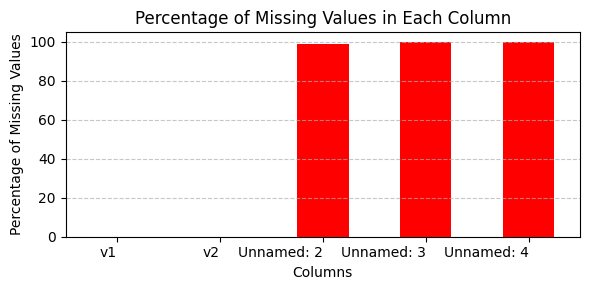

Column-wise missing value percentages:
v1: 0.00%
v2: 0.00%
Unnamed: 2: 99.10%
Unnamed: 3: 99.78%
Unnamed: 4: 99.89%


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_missing_value_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Plot the missing value percentages
    plt.figure(figsize=(6, 3))
    missing_percentage.plot(kind='bar', color='red')
    plt.title('Percentage of Missing Values in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=0, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Print column-wise missing value percentages
    print("Column-wise missing value percentages:")
    for column, percentage in missing_percentage.items():
        print(f"{column}: {percentage:.2f}%")

plot_missing_value_percentage(dataset)


In [27]:
import pandas as pd

def drop_columns_with_high_missing_percentage(df, threshold=90):
    # Calculate the percentage of missing values for each column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Identify columns with missing percentage greater than the threshold
    columns_to_drop = missing_percentage[missing_percentage > threshold].index

    # Drop the identified columns from the dataset
    dataset_after_dropping = df.drop(columns=columns_to_drop)

    # Print columns dropped
    print("Columns dropped due to high missing percentage (> {}%):".format(threshold))
    print(columns_to_drop)

    return dataset_after_dropping


# Drop columns with high missing percentage (> 90%) from the dataset
dataset = drop_columns_with_high_missing_percentage(dataset)
dataset.head()


Columns dropped due to high missing percentage (> 90%):
Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
def print_column_value_counts(df):
  print("Printing Value Counts")
  i=1
  for column in list(df.columns):
      print(f"Column {i}:{column}")
      print("-"*30)
      print(f"{df[column].value_counts()}")
      print("-"*30)
      i+=1
print_column_value_counts(dataset)
#dataset["v2"].value_counts()

Printing Value Counts
Column 1:v1
------------------------------
ham     4825
spam     747
Name: v1, dtype: int64
------------------------------
Column 2:v2
------------------------------
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle t

In [29]:
# def remove_duplicates(df):
#     # Print duplicates
#     duplicate_rows = df[df.duplicated()]
#     if not duplicate_rows.empty:
#         print("Duplicate Rows:")
#         print(duplicate_rows)
#     else:
#         print("No duplicate rows found.")

#     # Remove duplicates
#     df.drop_duplicates(inplace=True)

#     print("Duplicates removed.")
#     return df
# dataset = remove_duplicates(dataset)


## **>> Renaming dataset columns**

In [30]:
 dataset.rename(columns={"v1": "target","v2":"messages"}, inplace=True)
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## **>> Encoding the target column**

In [31]:
def encode_target_variable(df, target_column):
    # Create a copy of the dataset
    encoded_dataset = df.copy()
    # Encode the target variable
    encoded_dataset[target_column] = encoded_dataset[target_column].map({"ham": 0, "spam": 1})
    return encoded_dataset

# Encode the target variable
dataset = encode_target_variable(dataset, target_column="target")
dataset.head()


,target,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation(df):
    # Calculate correlation matrix
    corr_matrix = df.corr()

    # Plot correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix')
    plt.show()

# Example usage:
# Assuming 'dataset' is the DataFrame containing your dataset
# You can call the function like this:
# plot_correlation(dataset)


## **>> Text messages cleaning**

In [33]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

def preprocessor(df):
    # Lowercasing
    df['cleaned_message'] = df['messages'].apply(lambda x: x.lower())
    # Punctuation Removal
    df['cleaned_message'] = df['cleaned_message'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    # Whitespace Normalization
    df['cleaned_message'] = df['cleaned_message'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
    # URL Removal
    df['cleaned_message'] = df['cleaned_message'].apply(lambda x: re.sub(r'http\S+', '', x))
    # Tokenization and Stopword Removal
    stop_words = set(stopwords.words('english'))
    df['tokens'] = df['cleaned_message'].apply(lambda x: word_tokenize(x))
    df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

    # Stemming
    stemmer = PorterStemmer()
    df['tokens'] = df['tokens'].apply(lambda x:[stemmer.stem(token) for token in x])
    # Rare Word Removal
    all_tokens = [token for tokens in df['tokens'] for token in tokens]
    token_counts = Counter(all_tokens)
    rare_words = set(token for token, count in token_counts.items() if count <= 1)
    df['processed_tokens'] = df['tokens'].apply(lambda x: ' '.join([token for token in x if token not in rare_words])) # Join tokens into a single string
    return df
# Apply preprocessing to the dataset
dataset = preprocessor(dataset)

# Display the preprocessed dataset
dataset.head()

,target,messages,cleaned_message,tokens,processed_tokens
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazi, avail, bugi, n, gre...",go point crazi avail bugi n great world la e b...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though


# **Model Traning and Evaluation**

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# Split the dataset into features (X) and target variable (y)
X = dataset['processed_tokens']
y = dataset['target']

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into numerical features
X_tfidf = tfidf_vectorizer.fit_transform(X)



1.   **Naive Bayes**
2.   **Logistic Regression**
3.   **Support Vector Machine**
4.   **XGBoost Classififer**

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score,precision_score
from sklearn.model_selection import train_test_split
import pandas as pd


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "XGBoost Classifier": XGBClassifier()
}
f1_scores=[]
accuracy_scores=[]
precision_scores=[]
# Train classifiers and calculate F1 score
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Assuming X_train_tfidf is the TF-IDF transformed training data
    y_pred = clf.predict(X_test)  # Assuming X_test_tfidf is the TF-IDF transformed testing data
    f1 = f1_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    f1_scores.append((name,f1))
    accuracy_scores.append((name,accuracy))
    precision_scores.append((name,precision))
    print("="*10+f"{name}"+"="*10)
    print(f"F1 Score for {name}: {f1}")
    print(f"Accuracy Score for {name}: {accuracy}")
    print(f"Precision Score for {name}: {precision}")
    print("-"*80)



==========Naive Bayes==========
F1 Score for Naive Bayes: 0.9090909090909091
Accuracy Score for Naive Bayes: 0.9775784753363229
Precision Score for Naive Bayes: 1.0
--------------------------------------------------------------------------------
==========Logistic Regression==========
F1 Score for Logistic Regression: 0.7679999999999999
Accuracy Score for Logistic Regression: 0.9479820627802691
Precision Score for Logistic Regression: 0.96
--------------------------------------------------------------------------------
==========Support Vector Machine==========
F1 Score for Support Vector Machine: 0.8978102189781021
Accuracy Score for Support Vector Machine: 0.9748878923766816
Precision Score for Support Vector Machine: 0.9919354838709677
--------------------------------------------------------------------------------
==========XGBoost Classifier==========
F1 Score for XGBoost Classifier: 0.8623188405797102
Accuracy Score for XGBoost Classifier: 0.9659192825112107
Precision Score for X

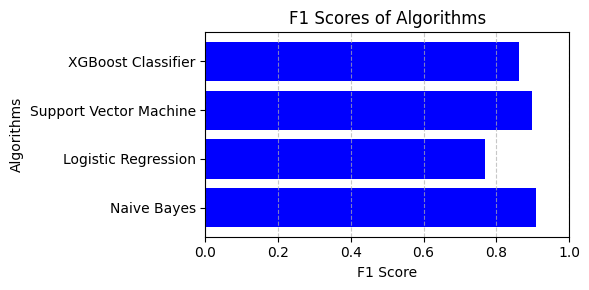

In [37]:
import matplotlib.pyplot as plt

def plot_f1_scores(f1_Scores):

    # Extract algorithm names and F1 scores from the list of tuples
    algorithms, scores = zip(*f1_Scores)

    # Plot bar plot
    plt.figure(figsize=(6, 3))
    plt.barh(algorithms, scores, color='blue')
    plt.title('F1 Scores of Algorithms')
    plt.xlabel('F1 Score')
    plt.ylabel('Algorithms')
    plt.xlim(0, 1)  # Setting x-axis limit from 0 to 1
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_f1_scores(f1_scores)


In [38]:
algorithm_performance = pd.DataFrame(accuracy_scores, columns=['Algorithm', 'Accuracy'])
algorithm_performance['Precision'] = pd.DataFrame(precision_scores)[1]
algorithm_performance['F1 Score'] = pd.DataFrame(f1_scores)[1]
algorithm_performance

,Algorithm,Accuracy,Precision,F1 Score
0,Naive Bayes,0.977578,1.000000,0.909091
1,Logistic Regression,0.947982,0.960000,0.768000
2,Support Vector Machine,0.974888,0.991935,0.897810
3,XGBoost Classifier,0.965919,0.944444,0.862319


## **>> Model Chosen: Naive Bayes**
1. **F1 Score for Naive Bayes: 0.909**
2. **Accuracy Score for Naive Bayes: 0.977**
3. **Precision Score for Naive Bayes: 1.0**

F1 Score: 0.9090909090909091
Accuracy Score: 0.9775784753363229
Precision Score : 1.0


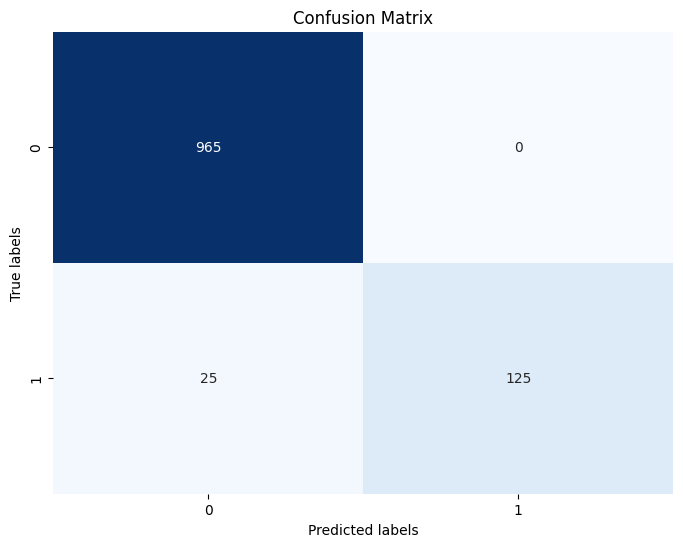

In [39]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



classifier = MultinomialNB()
# Train the classifier
classifier.fit(X_train, y_train)
# Make predictions
y_pred = classifier.predict(X_test)

#Evaluation
f1_nb = f1_score(y_test, y_pred, average='binary')
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
print(f"F1 Score: {f1_nb}")
print(f"Accuracy Score: {accuracy_nb}")
print(f"Precision Score : {precision_nb}")
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

d# **>> Naive Bayes Model hyperparameters tuning**
## **Improved Accuracy : 0.982**





In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

X = dataset['processed_tokens']
y = dataset['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a pipeline with TfidfVectorizer and MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Define the parameter grid
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams or bigrams
    'tfidf__max_df': [0.5, 0.75, 1.0],  # Maximum document frequency
    'clf__alpha': [0.1, 0.5, 1.0],  # Smoothing parameter
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print("Accuracy on test set:",accuracy)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'clf__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 2)}
Accuracy on test set: 0.9829596412556054
